# Анализ данных с Pandas
[(**Pan**el **da**ta)](https://pandas.pydata.org/index.html)
## Часть 2

## Cодержание
* [Стастистика по данным](#Статистики по признакам)
* [Работа с пропусками](#Работа с пропусками)
* [Применение функции к данным, расчет новых значений](#Применение функции к данным)
* [Группировка и аггрегация с GroupBy](#Группировка и аггрегация с GroupBy)
* [Визаулизация в Pandas](#Визуализация в Pandas)

Считаем данные из файла на этот раз возьмем популярный датасет [Титаник](https://www.kaggle.com/c/titanic)

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 11)

In [3]:
titanic = pd.read_csv('./data/titanic_train.csv', sep=',', index_col='PassengerId')

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Размер данных

In [6]:
titanic.shape

(891, 11)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# <a id="Статистики по признакам"><span style="color:green"> Статистики по признакам </span></a>

## Расчет частоты события
- `.sum()` вектора из нулей и единиц = количество единиц
- `.mean()` вектора из нулей и единиц = доля единиц

Доля выживших

In [8]:
titanic['Survived'].mean()

0.3838383838383838

Число выживших и утонувших

In [9]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Число мужчин и женщин

In [10]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Доля пассажиров женского пола

In [11]:
(titanic['Sex'] == 'female').mean()

0.35241301907968575

Доля выживших среди женщин

In [12]:
titanic[titanic['Sex'] == 'female']['Survived'].mean()

0.7420382165605095

Количество выживших среди женщин

In [13]:
titanic[titanic['Sex'] == 'female']['Survived'].sum()

233

** Примечание **   
Не путайте c count(). Метод count возвращает число заполненных строк!

In [14]:
titanic[(titanic['Sex'] == 'female')]['Survived'].count()

314

## Min, Max, Mean, Median

Для числовых признаков можно определить некоторые статистики

In [15]:
titanic['Age'].min()

0.42

In [16]:
titanic['Age'].max()

80.0

In [17]:
titanic['Age'].median()

28.0

In [18]:
titanic['Age'].mean()

29.69911764705882

Если нужно оценить сразу все признаки, то вуа-ля:

In [19]:
titanic.min()

Survived                      0
Pclass                        1
Name        Abbing, Mr. Anthony
Sex                      female
Age                        0.42
SibSp                         0
Parch                         0
Ticket                   110152
Fare                          0
dtype: object

In [20]:
titanic.max()

Survived                              1
Pclass                                3
Name        van Melkebeke, Mr. Philemon
Sex                                male
Age                                  80
SibSp                                 8
Parch                                 6
Ticket                        WE/P 5735
Fare                            512.329
dtype: object

In [21]:
titanic.mean()

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [22]:
titanic.median()

Survived     0.0000
Pclass       3.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

# <a id="Работа с пропусками"><span style="color:green"> Работа с пропусками </span></a>

Нам повезло у нас немного данных с пропущенными значениями, но часто это совсем не так!   
<span style="color:blue">Ваши идеи откуда берутся пропуски в данных и как их заполнять?!</span>

Для начала, стоит оценить долю пропусков по столбцам и по строкам. Может оказаться так, что по некоторым столбцам совсем нет данных и там очень много NULLов, возможно такие столбцы стоит отбросить, то же самое касается и строк, возможно по каким-то объектам крайне мало заполненых признаков возможно их стоит также отбросить.

Посмотрим количество пропусков по признакам

In [23]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Обычно количество незаполненных данных нам мало что говорит, важно знать а какая это доля данных?

In [24]:
titanic.isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Fare        0.000000
Ticket      0.000000
Parch       0.000000
SibSp       0.000000
Sex         0.000000
Name        0.000000
Pclass      0.000000
Survived    0.000000
dtype: float64

Итак у нас есть три признака с пропусками Cabin (номер кабины), Age (возраст) и Embarked (порт погрузки). Ваши идеи как их лучше заполнить или стоит их отбросить?

## Отбрасывание пропусков

Например вы решили отбросить данные с пропусками, как это сделать?   
С помощью метода [dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html). Обратите внимание, что у этого метода есть параметр `inplace`.

In [25]:
titanic.dropna(subset=['Cabin', 'Age', 'Embarked']).isnull().mean()

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
dtype: float64

Какой очевидный минус у такого способа?

## Заполнение пропусков значением

Заполнять пропуски можно с помощью метода [fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

Чем можно заполнить пропуски?

Например каким-то "странным" значением или нулем

In [26]:
titanic['Age'].fillna(value=-999)

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
6     -999.0
7       54.0
       ...  
885     25.0
886     39.0
887     27.0
888     19.0
889   -999.0
890     26.0
891     32.0
Name: Age, Length: 891, dtype: float64

In [27]:
titanic['Age'].fillna(value=0)

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6       0.0
7      54.0
       ... 
885    25.0
886    39.0
887    27.0
888    19.0
889     0.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

Можно заполнить средним или медианой

In [28]:
titanic['Age'].fillna(value=titanic['Age'].median())

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6      28.0
7      54.0
       ... 
885    25.0
886    39.0
887    27.0
888    19.0
889    28.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

Пропуски можно заполнять также с помощью последнего непропещунного значения в прямом (ffill) и обратном (bfill) порядках.

In [29]:
titanic['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
6       NaN
7       E46
       ... 
885     NaN
886     NaN
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [30]:
titanic['Cabin'].fillna(method='ffill')

PassengerId
1       NaN
2       C85
3       C85
4      C123
5      C123
6      C123
7       E46
       ... 
885     C50
886     C50
887     C50
888     B42
889     B42
890    C148
891    C148
Name: Cabin, Length: 891, dtype: object

In [31]:
titanic['Cabin'].fillna(method='bfill')

PassengerId
1       C85
2       C85
3      C123
4      C123
5       E46
6       E46
7       E46
       ... 
885     B42
886     B42
887     B42
888     B42
889    C148
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

### Удаление дубликатов

Бывае, что в данных есть дубликаты, если так получилось, то для начала стоит подумать откуда они взялись, нет ли в ошибков в получении таких данных. Если же дубликаты есть, то удалить их просто с мощью метода drop_duplicates()

[Документация по drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [32]:
titanic.drop_duplicates(inplace=True)

# <a id="Применение функции к данным"><span style="color:green"> Применение функции к данным, расчет новых значений </span></a>

Предположим мы хотим создать новый признак, который будет делить пассажиров на три категории в зависимости от из возраста. Как это сделать?

## Apply

Напишем функцию, которая по возрасту определяет категорию:

In [33]:
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [34]:
def age_group(age):
    if age < 18:
        return 0
    if age < 35:
        return 1
    else:
        return 2

А теперь применяем функцию к данным с помощтю метода `apply`:

In [35]:
titanic['Age_group'] = titanic['Age'].apply(age_group)

В данном случае мы воспользовались методом Serires но такой же метод есть и у DataFrame

In [36]:
titanic['Age_group'].head()

PassengerId
1    1
2    2
3    1
4    2
5    2
Name: Age_group, dtype: int64

Теперь нам нужно сформировать новый признак, который использует информацию сразу о нескольких признаках, применим apply ко всему DataFram'y:

Давайте всех, кто похож на ДиКаприо из фильма Титаник выделим в отдельную категорию just for fun:

In [37]:
titanic['New_feature'] = titanic.apply(lambda row:
                                       1 if 18 < row['Age'] < 20 and row['Sex'] == 'male' \
                                       and row['Pclass'] == 3 else 0, axis=1)

In [38]:
titanic[titanic['New_feature'] == 1].head()

,Survived,Pclass,Name,Sex,Age,...,Fare,Cabin,Embarked,Age_group,New_feature
PassengerId,,,,,,,,,,,
68,0,3,"Crease, Mr. Ernest James",male,19.0,...,8.1583,NaN,S,1,1
144,0,3,"Burke, Mr. Jeremiah",male,19.0,...,6.7500,NaN,Q,1,1
284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,...,8.0500,NaN,S,1,1
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,...,0.0000,NaN,S,1,1
373,0,3,"Beavan, Mr. William Thomas",male,19.0,...,8.0500,NaN,S,1,1


## Пример работы со строками

[Подробнее в документации](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [39]:
%timeit titanic['Name'].apply(lambda s: s.split(',')[0])

645 µs ± 44.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%timeit titanic['Name'].str.split(',').str[0]

1.17 ms ± 73.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
titanic['Name'].str.split(', ', n=1, expand=True)

,0,1
PassengerId,,
1,Braund,Mr. Owen Harris
2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,Heikkinen,Miss. Laina
4,Futrelle,Mrs. Jacques Heath (Lily May Peel)
5,Allen,Mr. William Henry
6,Moran,Mr. James
7,McCarthy,Mr. Timothy J
...,...,...
885,Sutehall,Mr. Henry Jr


In [42]:
titanic['Name'].str.len()

PassengerId
1      23
2      51
3      22
4      44
5      24
6      16
7      23
       ..
885    22
886    36
887    21
888    28
889    40
890    21
891    19
Name: Name, Length: 891, dtype: int64

In [43]:
titanic['Name'].str.contains('Mr.')

PassengerId
1       True
2       True
3      False
4       True
5       True
6       True
7       True
       ...  
885     True
886     True
887    False
888    False
889    False
890     True
891     True
Name: Name, Length: 891, dtype: bool

In [44]:
titanic['Ticket'].str.isdigit()

PassengerId
1      False
2      False
3      False
4       True
5       True
6       True
7       True
       ...  
885    False
886     True
887     True
888     True
889    False
890     True
891     True
Name: Ticket, Length: 891, dtype: bool

## Map

Заметим, что в данных есть бинарный признак `Sex`, который можно закодировать с помощью 0 и 1 вот так:

In [45]:
titanic['Sex_new'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [46]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,...,Cabin,Embarked,Age_group,New_feature,Sex_new
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,...,NaN,S,1,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,...,C85,C,2,0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,...,NaN,S,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,...,C123,S,2,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,...,NaN,S,2,0,0


Для дальнейшего изложения, удалим вновь созданные признаки:

In [47]:
titanic.drop(['Age_group', 'New_feature', 'Sex_new'], inplace=True, axis=1)

# <a id="Группировка и аггрегация с GroupBy"><span style="color:green">Группировка и аггрегация с GroupBy</span></a>

[**Split -> Apply -> Combine**](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

Под «группировкой» мы подразумеваем процесс, включающий один или несколько из следующих шагов:
- **Splitting the data** (разбиение на группы)
- **Applying a function** (применение функции к каждой группе)
- **Combining the results** (объединение результата)

Как посчитать долю выживших в разных группах?

Первый способ:

In [48]:
print('female\t', titanic.loc[titanic.Sex == 'female', 'Survived'].mean())
print('male\t', titanic.loc[titanic.Sex == 'male', 'Survived'].mean())

female	 0.7420382165605095
male	 0.18890814558058924


Второй способ чрез GropBy:

In [49]:
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Аналогично `GROUP BY` в SQL:
```sql
    SELECT Sex, AVG(Survived)
    FROM titanic
    GROUP BY Sex;
```

Группы по количеству родителей/детей на борту (parch)

In [50]:
titanic.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

## I Разбиение (Split)

### Разбиение по одному признаку


`GroupBy` хранит исходный `DataFrame` (или `Series`) и разбиение на группы, т.е. соответствие "название группы (значение колонки, по которой группируем) – список индексов"

In [51]:
splits = titanic.groupby('Sex')
print(type(splits))

<class 'pandas.core.groupby.DataFrameGroupBy'>


In [52]:
splits.groups

{'female': Int64Index([  2,   3,   4,   9,  10,  11,  12,  15,  16,  19,
             ...
             867, 872, 875, 876, 880, 881, 883, 886, 888, 889],
            dtype='int64', name='PassengerId', length=314),
 'male': Int64Index([  1,   5,   6,   7,   8,  13,  14,  17,  18,  21,
             ...
             874, 877, 878, 879, 882, 884, 885, 887, 890, 891],
            dtype='int64', name='PassengerId', length=577)}

**get_group**

In [53]:
splits.get_group('female')  # тот же результат, что и titanic.loc[titanic.Sex == 'female']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


### Другие способы разбиения

- по нескольким колонкам

In [54]:
titanic.groupby(['Sex', 'Pclass']).groups.keys()

dict_keys([('female', 1), ('female', 2), ('female', 3), ('male', 1), ('male', 2), ('male', 3)])

- по колонке, которой нет в исходном `DataFrame`

In [55]:
adult = (titanic['Age'] >= 18)
adult.loc[titanic.Age.isnull()] = np.nan

In [56]:
adult.value_counts(dropna=False)

 1.0    601
NaN     177
 0.0    113
Name: Age, dtype: int64

In [57]:
titanic.groupby(adult).groups.keys()

dict_keys([0.0, 1.0])

**Важное замечение**  
Группа, соответствующая значению `NaN`, не создается. Можно это обойти, предварительно заполнив `NaN` каким-нибудь специальным значением.

In [58]:
titanic.groupby(adult.fillna('NA')).groups.keys()

dict_keys([0.0, 1.0, 'NA'])

- по значению функции, рассчитанной по индексу

Разделим на три группы по индексу:

In [59]:
titanic.groupby(lambda s: s % 3).groups

{0: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,
             ...
             864, 867, 870, 873, 876, 879, 882, 885, 888, 891],
            dtype='int64', name='PassengerId', length=297),
 1: Int64Index([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,
             ...
             862, 865, 868, 871, 874, 877, 880, 883, 886, 889],
            dtype='int64', name='PassengerId', length=297),
 2: Int64Index([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,
             ...
             863, 866, 869, 872, 875, 878, 881, 884, 887, 890],
            dtype='int64', name='PassengerId', length=297)}

In [60]:
titanic.groupby(titanic.index % 3).groups  # то же самое

{0: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,
             ...
             864, 867, 870, 873, 876, 879, 882, 885, 888, 891],
            dtype='int64', name='PassengerId', length=297),
 1: Int64Index([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,
             ...
             862, 865, 868, 871, 874, 877, 880, 883, 886, 889],
            dtype='int64', name='PassengerId', length=297),
 2: Int64Index([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,
             ...
             863, 866, 869, 872, 875, 878, 881, 884, 887, 890],
            dtype='int64', name='PassengerId', length=297)}

**Замечание**  
Можно разбивать не только по строкам, но и по столбцам (`axis=1`)

In [61]:
titanic.groupby(lambda s: s.startswith('S'), axis=1).groups  # то же самое

{False: Index(['Pclass', 'Name', 'Age', 'Parch', 'Ticket', 'Fare', 'Cabin',
        'Embarked'],
       dtype='object'),
 True: Index(['Survived', 'Sex', 'SibSp'], dtype='object')}

## II Агрегация (Apply + Combine)

Функции для агрегации:
   - mean() среднее
   - nunique() колиечество уникальных
   - count() количество
   - fisrt() первая запись в группе
   - last() последняя запись в группе
   - заданная функция

Количество по группам

In [62]:
splits.count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


Количество уникальных значений по группам

In [63]:
splits.nunique()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,2,3,314,1,63,7,7,247,156,75,3
male,2,3,577,1,82,7,6,519,193,96,3


Среднее по группам

In [64]:
splits.mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Доступ к отдельному столбцу с тем же самым разбиением:

In [65]:
splits.Survived

In [66]:
splits.Survived.mean()  # быстрее, чем spilts.mean().Survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [67]:
splits.Cabin.nunique()

Sex
female    75
male      96
Name: Cabin, dtype: int64

Первая/последняя/n-ая запись внутри каждой группы:

In [68]:
splits.first()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S


In [69]:
splits.last()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,W./C. 6607,23.45,B42,S
male,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,C148,Q


In [70]:
splits.nth(400)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,SibSp,Survived,Ticket
Sex,,,,,,,,,,
male,32.0,B50,C,30.5,"Stahelin-Maeglin, Dr. Max",0,1,0,1,13214


### agg

Применение нескольких функций  
[Документация по agg](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [71]:
splits['Survived'].agg(['mean', 'std', 'count'])

,mean,std,count
Sex,,,
female,0.742038,0.438211,314
male,0.188908,0.391775,577


**Заданная пользователем функция**

In [72]:
def oldest(df):
    ddf = df.copy()
    ddf = ddf.sort_values('Age')
    ddf['Num'] = list(range(1, 1 + len(ddf)))
    return ddf

In [73]:
splits.apply(oldest)

Age Cabin Embarked     Fare  \
Sex    PassengerId                                 
female 470          0.75   NaN        C  19.2583   
       645          0.75   NaN        C  19.2583   
       382          1.00   NaN        C  15.7417   
       173          1.00   NaN        S  11.1333   
       643          2.00   NaN        S  27.9000   
       531          2.00   NaN        S  26.0000   
       480          2.00   NaN        S  12.2875   
...                  ...   ...      ...      ...   
male   833           NaN   NaN        C   7.2292   
       838           NaN   NaN        S   8.0500   
       840           NaN   C47        C  29.7000   
       847           NaN   NaN        S  69.5500   
       860           NaN   NaN        C   7.2292   
       869           NaN   NaN        S   9.5000   
       879           NaN   NaN        S   7.8958   

                                             Name  Parch  Pclass  SibSp  \
Sex    PassengerId                                                        
female 470          Baclini, Miss. Helene Barbara      1       3      2   
       645                 Baclini, Miss. Eugenie      1       3      2   
       382            Nakid, Miss. Maria ("Mary")      2       3      0   
       173           Johnson, Miss. Eleanor Ileen      1       3      1   
       643          Skoog, Miss. Margit Elizabeth      2       3      3   
       531               Quick, Miss. Phyllis May      1       2      1   
       480               Hirvonen, Miss. Hildur E      1       3      0   
...                                           ...    ...     ...    ...   
male   833                         Saad, Mr. Amin      0       3      0   
       838                    Sirota, Mr. Maurice      0       3      0   
       840                   Marechal, Mr. Pierre      0       1      0   
       847               Sage, Mr. Douglas Bullen      2       3      8   
       860                       Razi, Mr. Raihed      0       3      0   
       869            van Melkebeke, Mr. Philemon      0       3      0   
       879                     Laleff, Mr. Kristo      0       3      0   

                    Survived    Ticket  Num  
Sex    PassengerId                           
female 470                 1      2666    1  
       645                 1      2666    2  
       382                 1      2653    3  
       173                 1    347742    4  
       643                 0    347088    5  
       531                 1     26360    6  
       480                 1   3101298    7  
...                      ...       ...  ...  
male   833                 0      2671  571  
       838                 0    392092  572  
       840                 1     11774  573  
       847                 0  CA. 2343  574  
       860                 0      2629  575  
       869                 0    345777  576  
       879                 0    349217  577  

[891 rows x 11 columns]

# <a id="Визуализация в Pandas"><span style="color:green"> Визуализация в Pandas </span></a>

[Документация с примерами](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

In [74]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

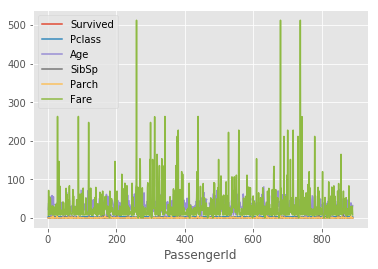

In [75]:
titanic.plot();

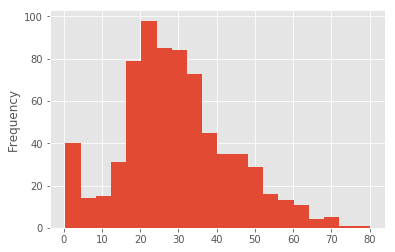

In [76]:
titanic['Age'].plot.hist(bins=20);

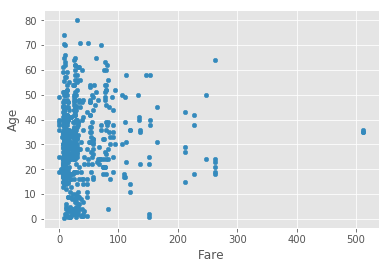

In [77]:
titanic.plot.scatter('Fare', 'Age');

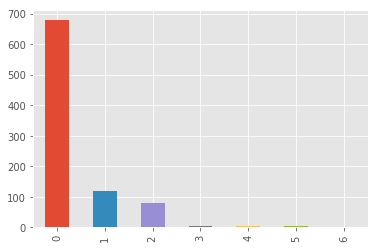

In [78]:
titanic['Parch'].value_counts(sort=False).plot.bar();